In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score





In [ ]:
# Veri setimizi yükledik
df = pd.read_csv('/content/E_Commerce_Dataset.csv')


In [ ]:
# Burda Veri setinin ilk birkaç satırına göz attık
print(df.head())
print(df.columns)


  Ürün Adı    Kategori   Marka  Fiyat  Stok Miktarı  Satış Sayısı  \
0    Ürün5  Ev & Bahçe  Marka5     55            96           283   
1    Ürün8    Kozmetik  Marka1    120            37           835   
2    Ürün8    Aksesuar  Marka5    110            14           457   
3    Ürün9  Ev & Bahçe  Marka4    133             7           254   
4    Ürün2  Ev & Bahçe  Marka3    268            80            35   

   Yorum Sayısı  Ortalama Puan                       Tarih  
0             1            1.9  2024-02-17 15:18:45.291585  
1            11            4.0  2023-07-21 15:18:45.292898  
2             3            2.9  2024-03-19 15:18:45.293026  
3             8            4.7  2024-03-01 15:18:45.293077  
4            12            3.5  2024-05-21 15:18:45.293117  
Index(['Ürün Adı', 'Kategori', 'Marka', 'Fiyat', 'Stok Miktarı',
       'Satış Sayısı', 'Yorum Sayısı', 'Ortalama Puan', 'Tarih'],
      dtype='object')


In [ ]:
# Eksik verilerimizi kontrol ettik
print(df.isnull().sum())
# Veri türlerimizi kontrol ettik
print(df.dtypes)


Ürün Adı         0
Kategori         0
Marka            0
Fiyat            0
Stok Miktarı     0
Satış Sayısı     0
Yorum Sayısı     0
Ortalama Puan    0
Tarih            0
dtype: int64
Ürün Adı          object
Kategori          object
Marka             object
Fiyat              int64
Stok Miktarı       int64
Satış Sayısı       int64
Yorum Sayısı       int64
Ortalama Puan    float64
Tarih             object
dtype: object


In [ ]:
# Veri setindeki kategorik değişkenlerimizi belirledik
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Kategorik Sütunlar:", categorical_columns)


Kategorik Sütunlar: Index(['Ürün Adı', 'Kategori', 'Marka', 'Tarih'], dtype='object')


In [ ]:

# Label Encoding
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# İlk birkaç satıra göz atalım
print(df.head())


   Ürün Adı  Kategori  Marka  Fiyat  Stok Miktarı  Satış Sayısı  Yorum Sayısı  \
0         5         2      4     55            96           283             1   
1         8         4      0    120            37           835            11   
2         8         0      4    110            14           457             3   
3         9         2      3    133             7           254             8   
4         2         2      2    268            80            35            12   

   Ortalama Puan  Tarih  
0            1.9    683  
1            4.0     95  
2            2.9    764  
3            4.7    714  
4            3.5    934  


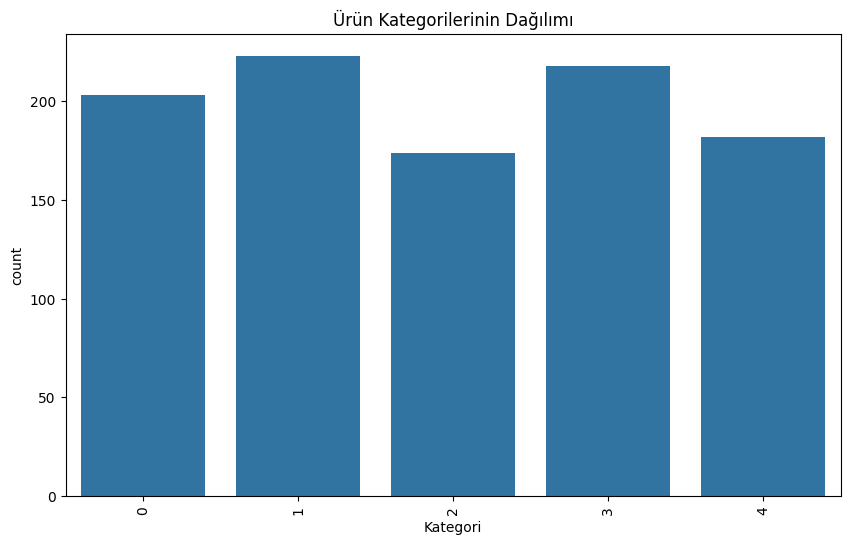

In [ ]:
# Ürün kategorilerinin dağılımını görselleştirelim
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Kategori')
plt.xticks(rotation=90)
plt.title('Ürün Kategorilerinin Dağılımı')
plt.show()


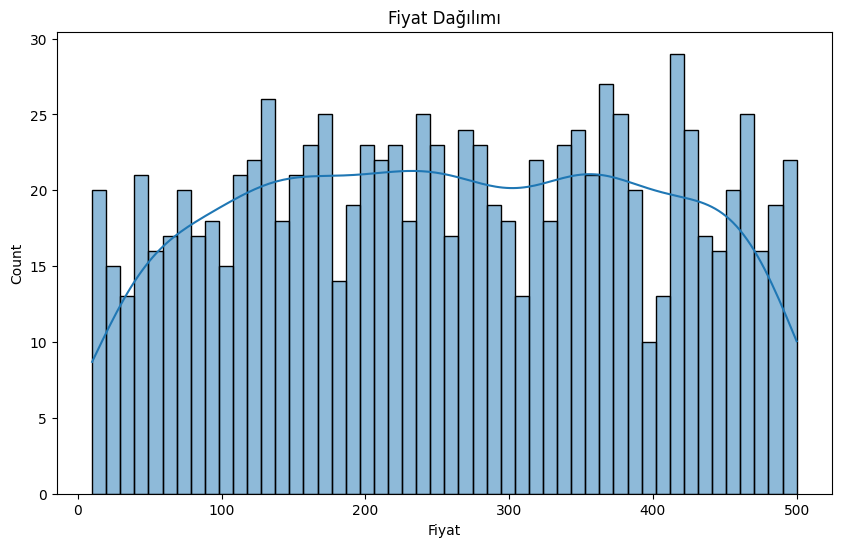

In [ ]:
# Ürünlerin fiyat dağılımını görselleştirelim
plt.figure(figsize=(10,6))
sns.histplot(df['Fiyat'], bins=50, kde=True)
plt.title('Fiyat Dağılımı')
plt.show()


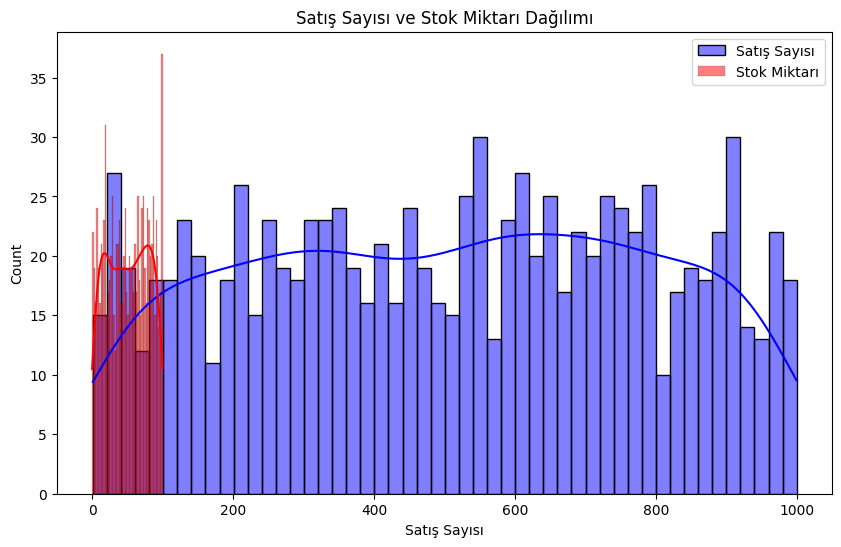

In [ ]:
# Satış sayılarını ve stok miktarlarını görselleştirelim
plt.figure(figsize=(10,6))
sns.histplot(df['Satış Sayısı'], bins=50, kde=True, color='blue', label='Satış Sayısı')
sns.histplot(df['Stok Miktarı'], bins=50, kde=True, color='red', label='Stok Miktarı')
plt.legend()
plt.title('Satış Sayısı ve Stok Miktarı Dağılımı')
plt.show()


In [ ]:
# Yukarda  örneklediğimiz gibi, diğer kategorik değişkenler için de kodlama yapabiliriz
categorical_columns = df.select_dtypes(['category']).columns
df = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
# Model için önemli olabilecek özellikleri seçme
# Bu aşamada domain bilgisine göre önemli özellikleri belirlememiz gerekebilir
features = df[['Fiyat', 'Satış Sayısı', 'Stok Miktarı', 'Kategori']] # Örnek olarak bazı sütunları seçtik

target = df['Fiyat']

In [ ]:

# Sayısal özellikleri normalize ettik
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


In [ ]:
# Veri setini eğitim ve test kümelerine ayırdık
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)


In [ ]:

# Model seçimini yaptık (örnek olarak Random Forest kullanacağız)
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Modeli eğitme
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

# Modelin performansını değerlendirdik
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Doğruluk: {accuracy}")
print(f"Hassasiyet: {precision}")
print(f"Geri Çağırma: {recall}")
print(f"F1 Skoru: {f1}")


Doğruluk: 0.135
Hassasiyet: 0.1225
Geri Çağırma: 0.135
F1 Skoru: 0.11983333333333332


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
